# Imports 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import seaborn as sns
import sklearn.metrics as skm
import statsmodels as stm

# Introducción

# Datos a Analizar

## Demanda

In [24]:
demanda_DP = pd.read_excel('./Data para Proyecciones/Demanda entregada a DP.xlsx', sheet_name='DEMANDA', usecols='A:I' )
demanda_DP = demanda_DP.drop(columns=['MAL ANTISHOCK', 'MAL COMUNES', 'Market Share antishock', 'Market Share común'])
demanda_DP
demanda_DP.head()

,Periodo,Demanda guantes antishock de De Pascale S.A.,Demanda guantes comunes De Pascale S.A.,Demanda guantes antishock a nivel nacional,Demanda guantes comunes a nivel nacional
0,2015-01-01,596,136805,1508.860759,273610
1,2015-02-01,790,128005,1987.421384,256010
2,2015-03-01,1085,126338,2712.500000,252676
3,2015-04-01,950,101284,2360.248447,202568
4,2015-05-01,1623,116033,4007.407407,232066


In [13]:
demanda_DP.reset_index(inplace=True)
demanda_DP.rename(columns={'index':'t'}, inplace=True)
demanda_DP.head()

,t,Periodo,Demanda guantes antishock de De Pascale S.A.,Demanda guantes comunes De Pascale S.A.,Demanda guantes antishock a nivel nacional,Demanda guantes comunes a nivel nacional
0,0,2015-01-01,596,136805,1508.860759,273610
1,1,2015-02-01,790,128005,1987.421384,256010
2,2,2015-03-01,1085,126338,2712.500000,252676
3,3,2015-04-01,950,101284,2360.248447,202568
4,4,2015-05-01,1623,116033,4007.407407,232066


In [16]:
demanda_DP.columns

Index(['t', 'Periodo', 'Demanda guantes antishock de De Pascale S.A.',
       'Demanda guantes comunes De Pascale S.A.',
       'Demanda guantes antishock a nivel nacional',
       'Demanda guantes comunes a nivel nacional', 'demanda_total_guantes'],
      dtype='object')

In [17]:
demanda_DP[['Demanda guantes antishock de De Pascale S.A.',
       'Demanda guantes comunes De Pascale S.A.',
       'Demanda guantes antishock a nivel nacional',
       'Demanda guantes comunes a nivel nacional', 'demanda_total_guantes']] = demanda_DP[['Demanda guantes antishock de De Pascale S.A.',
       'Demanda guantes comunes De Pascale S.A.',
       'Demanda guantes antishock a nivel nacional',
       'Demanda guantes comunes a nivel nacional', 'demanda_total_guantes']].astype(int)

In [18]:
demanda_DP['demanda_total_guantes'] = demanda_DP['Demanda guantes antishock a nivel nacional'].astype(int) + demanda_DP['Demanda guantes comunes a nivel nacional'].astype(int)
demanda_DP.head(3)

,t,Periodo,Demanda guantes antishock de De Pascale S.A.,Demanda guantes comunes De Pascale S.A.,Demanda guantes antishock a nivel nacional,Demanda guantes comunes a nivel nacional,demanda_total_guantes
0,0,2015-01-01,596,136805,1508,273610,275118
1,1,2015-02-01,790,128005,1987,256010,257997
2,2,2015-03-01,1085,126338,2712,252676,255388


(50000.0, 300000.0)

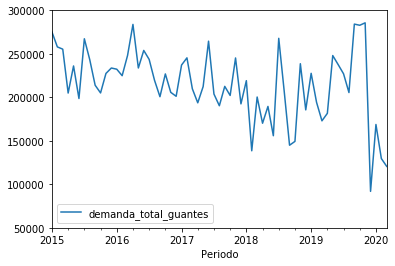

In [22]:
demanda_DP.plot(x='Periodo', y='demanda_total_guantes')
plt.ylim([50e3, 300e3])

## EMAE de Industria de la Construccion

In [696]:
dataset = pd.read_excel('./Data para Proyecciones/Dataset_Proyecciones.xlsx')
dataset.head()

,Demanda de guantes,ITCRM,EMAE Manufactura (t -1),EMAE Manufactura,EMAE Construccion (t-1),EMAE Construccion,Produccion Oil m3 Argentina,Produccion Oil m3 Patagonia,Precio Brent (t-1),Precio Brent (y - 1),Precio Brent,EMAE Mineria (t-1),EMAE Mineria,Produccion Gas Mm3 Argentina,Produccion Gas Mm3 Patagonia,PBI Valor Agregado,Juicios Notificados,Juicios Sin Resolver,Juicios con Sentencia,Juicios sin Sentencia,Año mes
0,275118.860759,79.543955,133.862326,118.272738,139.964452,146.689712,2.524610e+06,2.387218e+06,62.335000,108.117727,47.759500,94.773137,95.146670,3.595407e+06,2.908825e+06,4.274443e+06,111,66075,69,42,2015-01-01
1,257997.421384,78.841323,118.272738,116.838170,146.689712,147.782989,2.262535e+06,2.142219e+06,47.759500,108.900526,58.095500,95.146670,88.288470,3.229374e+06,2.628789e+06,4.274443e+06,9096,68487,6642,2452,2015-02-01
2,255388.500000,78.487223,116.838170,134.927216,147.782989,151.920156,2.518664e+06,2.384975e+06,58.095500,107.480952,55.885455,88.288470,97.375158,3.612211e+06,2.936375e+06,4.274443e+06,10341,71465,7335,3008,2015-03-01
3,204928.248447,77.783166,134.927216,137.381394,151.920156,151.984589,2.445076e+06,2.315147e+06,55.885455,107.755238,59.524286,97.375158,93.843158,3.515646e+06,2.818163e+06,5.016966e+06,10074,74450,7043,3030,2015-04-01
4,236073.407407,77.087749,137.381394,139.361062,151.984589,153.409565,2.536572e+06,2.406750e+06,59.524286,109.539091,64.075000,93.843158,100.678522,3.669902e+06,2.945839e+06,5.016966e+06,9827,77244,6985,2843,2015-05-01


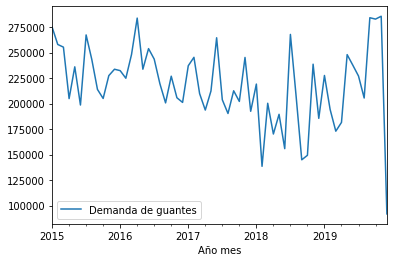

In [701]:
dataset.plot(x='Año mes', y='Demanda de guantes')

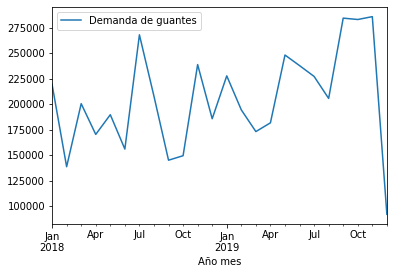

In [700]:
dataset.loc[dataset['Año mes'] >= '2018-01-01'].plot(x='Año mes', y='Demanda de guantes')

# Regresión

Quiero identificar variables que expliquen la demanda

In [734]:
dataset = pd.read_excel('./Data para Proyecciones/Dataset_Proyecciones.xlsx')
dataset.head()

,Demanda de guantes,ITCRM,EMAE Manufactura (t -1),EMAE Manufactura,EMAE Construccion (t-1),EMAE Construccion,Produccion Oil m3 Argentina,Produccion Oil m3 Patagonia,Precio Brent (t-1),Precio Brent (y - 1),Precio Brent,EMAE Mineria (t-1),EMAE Mineria,Produccion Gas Mm3 Argentina,Produccion Gas Mm3 Patagonia,PBI Valor Agregado,Juicios Notificados,Juicios Sin Resolver,Juicios con Sentencia,Juicios sin Sentencia,Año mes
0,275118.860759,79.543955,133.862326,118.272738,139.964452,146.689712,2.524610e+06,2.387218e+06,62.335000,108.117727,47.759500,94.773137,95.146670,3.595407e+06,2.908825e+06,4.274443e+06,111,66075,69,42,2015-01-01
1,257997.421384,78.841323,118.272738,116.838170,146.689712,147.782989,2.262535e+06,2.142219e+06,47.759500,108.900526,58.095500,95.146670,88.288470,3.229374e+06,2.628789e+06,4.274443e+06,9096,68487,6642,2452,2015-02-01
2,255388.500000,78.487223,116.838170,134.927216,147.782989,151.920156,2.518664e+06,2.384975e+06,58.095500,107.480952,55.885455,88.288470,97.375158,3.612211e+06,2.936375e+06,4.274443e+06,10341,71465,7335,3008,2015-03-01
3,204928.248447,77.783166,134.927216,137.381394,151.920156,151.984589,2.445076e+06,2.315147e+06,55.885455,107.755238,59.524286,97.375158,93.843158,3.515646e+06,2.818163e+06,5.016966e+06,10074,74450,7043,3030,2015-04-01
4,236073.407407,77.087749,137.381394,139.361062,151.984589,153.409565,2.536572e+06,2.406750e+06,59.524286,109.539091,64.075000,93.843158,100.678522,3.669902e+06,2.945839e+06,5.016966e+06,9827,77244,6985,2843,2015-05-01


In [735]:
# dataset = dataset.loc[dataset['Año mes'] > '2018-01-01']

In [736]:
dataset.drop(columns=['Año mes'], inplace=True)

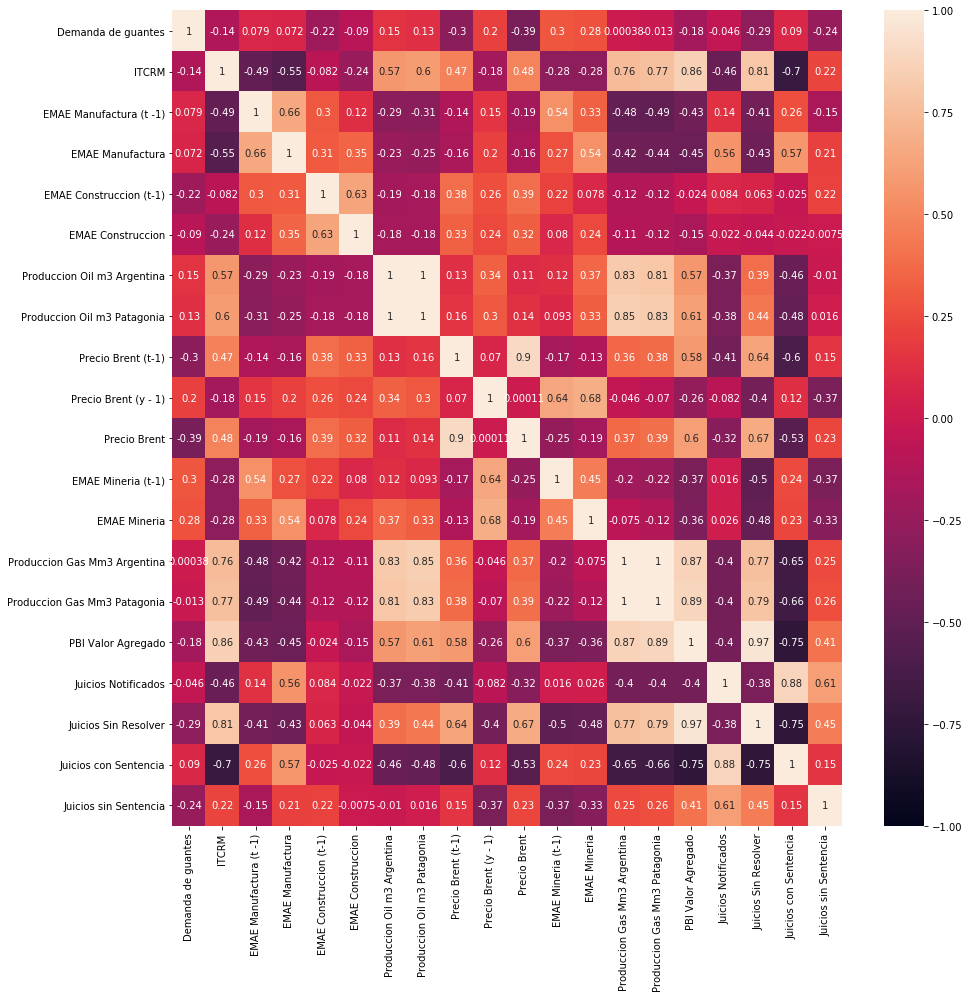

In [737]:
plt.figure(figsize=(15,15))
sns.heatmap(dataset.corr(), vmin=-1, vmax=1, annot=True)

In [738]:
import statsmodels.api as stm
from statsmodels.formula.api import ols

In [739]:
dataset.columns

Index(['Demanda de guantes', 'ITCRM', 'EMAE Manufactura (t -1)',
       'EMAE Manufactura', 'EMAE Construccion (t-1)', 'EMAE Construccion',
       'Produccion Oil m3 Argentina', 'Produccion Oil m3 Patagonia',
       'Precio Brent (t-1)', 'Precio Brent (y - 1)', 'Precio Brent',
       'EMAE Mineria (t-1)', 'EMAE Mineria', 'Produccion Gas Mm3 Argentina',
       'Produccion Gas Mm3 Patagonia', 'PBI Valor Agregado',
       'Juicios Notificados', 'Juicios Sin Resolver', 'Juicios con Sentencia',
       'Juicios sin Sentencia'],
      dtype='object')

In [740]:
results.pvalues

const                          0.601403
PBI Valor Agregado             0.003450
Produccion Oil m3 Patagonia    0.000713
Juicios Notificados            0.000143
Juicios con Sentencia          0.000143
Juicios sin Sentencia          0.000144
Produccion Oil m3 Argentina    0.000591
Precio Brent                   0.000752
dtype: float64

In [741]:
#Backward Elimination
X = dataset.drop(columns=['Demanda de guantes']).astype(float)
y = dataset['Demanda de guantes']

cols = list(X.columns)
np.random.shuffle(cols)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = stm.add_constant(X_1)
    model = stm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['Precio Brent (t-1)', 'Juicios Notificados', 'Produccion Oil m3 Patagonia', 'Produccion Oil m3 Argentina', 'Juicios sin Sentencia', 'PBI Valor Agregado', 'Juicios con Sentencia']


In [742]:
X_sf = dataset[selected_features_BE]
# X_sf = dataset[['Juicios Notificados', 'Juicios con Sentencia', 'Juicios sin Sentencia']]
y = dataset['Demanda de guantes']

X_sf = stm.add_constant(X_sf)
Y = dataset['Demanda de guantes']

model = stm.OLS(Y,X_sf, hasconst=True)

results = model.fit()
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Results: Ordinary least squares
=========================================================================================
Model:                      OLS                      Adj. R-squared:           0.352     
Dependent Variable:         Demanda de guantes       AIC:                      1419.1634 
Date:                       2020-04-26 10:40         BIC:                      1435.9182 
No. Observations:           60                       Log-Likelihood:           -701.58   
Df Model:                   7                        F-statistic:              5.572     
Df Residuals:               52                       Prob (F-statistic):       7.96e-05  
R-squared:                  0.429                    Scale:                    9.6852e+08
-----------------------------------------------------------------------------------------
                               Coef.     Std.Err.     t    P>|t|     [0.025      0.975]  
-----------------------------------------------------------------------------------------
const                       -81894.5583 90364.7678 -0.9063 0.3690 -263224.7307 99435.6140
Precio Brent (t-1)           -1592.6805   511.9384 -3.1111 0.0030   -2619.9600  -565.4010
Juicios Notificados          -3909.5294   966.0145 -4.0471 0.0002   -5847.9794 -1971.0794
Produccion Oil m3 Patagonia     -3.8022     1.0037 -3.7880 0.0004      -5.8163    -1.7880
Produccion Oil m3 Argentina      3.7533     0.9734  3.8560 0.0003       1.8001     5.7065
Juicios sin Sentencia         3910.6816   966.6335  4.0457 0.0002    1970.9895  5850.3736
PBI Valor Agregado               0.0114     0.0039  2.8928 0.0056       0.0035     0.0193
Juicios con Sentencia         3906.9405   965.7997  4.0453 0.0002    1968.9216  5844.9593
-----------------------------------------------------------------------------------------
Omnibus:                      3.048              Durbin-Watson:                 1.891    
Prob(Omnibus):                0.218              Jarque-Bera (JB):              1.727    
Skew:                         0.113              Prob(JB):                      0.422    
Kurtosis:                     2.200              Condition No.:                 265075760
=========================================================================================
* The condition number is large (3e+08). This might indicate             strong
multicollinearity or other numerical problems.
"""

In [743]:
selected_features_BE

['Precio Brent (t-1)',
 'Juicios Notificados',
 'Produccion Oil m3 Patagonia',
 'Produccion Oil m3 Argentina',
 'Juicios sin Sentencia',
 'PBI Valor Agregado',
 'Juicios con Sentencia']

## Desfasando un año

In [576]:
dataset = pd.read_excel('./Data para Proyecciones/Dataset_Proyecciones.xlsx')
dataset.head()

,Demanda de guantes,ITCRM,EMAE Manufactura (t -1),EMAE Manufactura,EMAE Construccion (t-1),EMAE Construccion,Produccion Oil m3 Argentina,Produccion Oil m3 Patagonia,Precio Brent (t-1),Precio Brent (y - 1),Precio Brent,EMAE Mineria (t-1),EMAE Mineria,Produccion Gas Mm3 Argentina,Produccion Gas Mm3 Patagonia,PBI Valor Agregado,Juicios Notificados,Juicios Sin Resolver,Juicios con Sentencia,Juicios sin Sentencia,Año mes
0,275118.860759,79.543955,133.862326,118.272738,139.964452,146.689712,2.524610e+06,2.387218e+06,62.335000,108.117727,47.759500,94.773137,95.146670,3.595407e+06,2.908825e+06,4.274443e+06,111,66075,69,42,2015-01-01
1,257997.421384,78.841323,118.272738,116.838170,146.689712,147.782989,2.262535e+06,2.142219e+06,47.759500,108.900526,58.095500,95.146670,88.288470,3.229374e+06,2.628789e+06,4.274443e+06,9096,68487,6642,2452,2015-02-01
2,255388.500000,78.487223,116.838170,134.927216,147.782989,151.920156,2.518664e+06,2.384975e+06,58.095500,107.480952,55.885455,88.288470,97.375158,3.612211e+06,2.936375e+06,4.274443e+06,10341,71465,7335,3008,2015-03-01
3,204928.248447,77.783166,134.927216,137.381394,151.920156,151.984589,2.445076e+06,2.315147e+06,55.885455,107.755238,59.524286,97.375158,93.843158,3.515646e+06,2.818163e+06,5.016966e+06,10074,74450,7043,3030,2015-04-01
4,236073.407407,77.087749,137.381394,139.361062,151.984589,153.409565,2.536572e+06,2.406750e+06,59.524286,109.539091,64.075000,93.843158,100.678522,3.669902e+06,2.945839e+06,5.016966e+06,9827,77244,6985,2843,2015-05-01


In [577]:

dataset['Año mes'] = pd.to_datetime(dataset['Año mes'])
dataset.set_index('Año mes', drop=True, inplace=True)
dataset.head()

,Demanda de guantes,ITCRM,EMAE Manufactura (t -1),EMAE Manufactura,EMAE Construccion (t-1),EMAE Construccion,Produccion Oil m3 Argentina,Produccion Oil m3 Patagonia,Precio Brent (t-1),Precio Brent (y - 1),Precio Brent,EMAE Mineria (t-1),EMAE Mineria,Produccion Gas Mm3 Argentina,Produccion Gas Mm3 Patagonia,PBI Valor Agregado,Juicios Notificados,Juicios Sin Resolver,Juicios con Sentencia,Juicios sin Sentencia
Año mes,,,,,,,,,,,,,,,,,,,,
2015-01-01,275118.860759,79.543955,133.862326,118.272738,139.964452,146.689712,2.524610e+06,2.387218e+06,62.335000,108.117727,47.759500,94.773137,95.146670,3.595407e+06,2.908825e+06,4.274443e+06,111,66075,69,42
2015-02-01,257997.421384,78.841323,118.272738,116.838170,146.689712,147.782989,2.262535e+06,2.142219e+06,47.759500,108.900526,58.095500,95.146670,88.288470,3.229374e+06,2.628789e+06,4.274443e+06,9096,68487,6642,2452
2015-03-01,255388.500000,78.487223,116.838170,134.927216,147.782989,151.920156,2.518664e+06,2.384975e+06,58.095500,107.480952,55.885455,88.288470,97.375158,3.612211e+06,2.936375e+06,4.274443e+06,10341,71465,7335,3008
2015-04-01,204928.248447,77.783166,134.927216,137.381394,151.920156,151.984589,2.445076e+06,2.315147e+06,55.885455,107.755238,59.524286,97.375158,93.843158,3.515646e+06,2.818163e+06,5.016966e+06,10074,74450,7043,3030
2015-05-01,236073.407407,77.087749,137.381394,139.361062,151.984589,153.409565,2.536572e+06,2.406750e+06,59.524286,109.539091,64.075000,93.843158,100.678522,3.669902e+06,2.945839e+06,5.016966e+06,9827,77244,6985,2843


In [578]:
dataset.columns.tolist()

['Demanda de guantes',
 'ITCRM',
 'EMAE Manufactura (t -1)',
 'EMAE Manufactura',
 'EMAE Construccion (t-1)',
 'EMAE Construccion',
 'Produccion Oil m3 Argentina',
 'Produccion Oil m3 Patagonia',
 'Precio Brent (t-1)',
 'Precio Brent (y - 1)',
 'Precio Brent',
 'EMAE Mineria (t-1)',
 'EMAE Mineria',
 'Produccion Gas Mm3 Argentina',
 'Produccion Gas Mm3 Patagonia',
 'PBI Valor Agregado',
 'Juicios Notificados',
 'Juicios Sin Resolver',
 'Juicios con Sentencia',
 'Juicios sin Sentencia']

In [579]:
drop_cols = [col for col in dataset.columns if ('(' in col ) or ('Patagonia' in col)]
dataset.drop(columns=drop_cols, inplace=True)

In [580]:
dataset.drop(columns=[
    'Juicios Sin Resolver',
 'Juicios con Sentencia',
 'Juicios sin Sentencia',
     'EMAE Construccion',
#  'Produccion Oil m3 Argentina',
#     'Produccion Gas Mm3 Argentina',
], inplace=True)

In [581]:
# dataset['EMAE Manufactura (y-1)'] = 

for col in dataset.drop(columns=['Demanda de guantes', 'ITCRM']):
    
    
    new_name = f'{col} (y-1)'
    
    dataset[new_name] = dataset[col].shift(periods=12).fillna(0)
    
    new_name_2 = f'{col} squared'
    
    dataset[new_name_2] = dataset[col].apply(lambda x: x**2)
    
dataset.head()

,Demanda de guantes,ITCRM,EMAE Manufactura,Produccion Oil m3 Argentina,Precio Brent,EMAE Mineria,Produccion Gas Mm3 Argentina,PBI Valor Agregado,Juicios Notificados,EMAE Manufactura (y-1),EMAE Manufactura squared,Produccion Oil m3 Argentina (y-1),Produccion Oil m3 Argentina squared,Precio Brent (y-1),Precio Brent squared,EMAE Mineria (y-1),EMAE Mineria squared,Produccion Gas Mm3 Argentina (y-1),Produccion Gas Mm3 Argentina squared,PBI Valor Agregado (y-1),PBI Valor Agregado squared,Juicios Notificados (y-1),Juicios Notificados squared
Año mes,,,,,,,,,,,,,,,,,,,,,,,
2015-01-01,275118.860759,79.543955,118.272738,2.524610e+06,47.759500,95.146670,3.595407e+06,4.274443e+06,111,0.0,13988.440500,0.0,6.373654e+12,0.0,2280.969840,0.0,9052.888837,0.0,1.292695e+13,0.0,1.827086e+13,0.0,12321
2015-02-01,257997.421384,78.841323,116.838170,2.262535e+06,58.095500,88.288470,3.229374e+06,4.274443e+06,9096,0.0,13651.157891,0.0,5.119065e+12,0.0,3375.087120,0.0,7794.853927,0.0,1.042885e+13,0.0,1.827086e+13,0.0,82737216
2015-03-01,255388.500000,78.487223,134.927216,2.518664e+06,55.885455,97.375158,3.612211e+06,4.274443e+06,10341,0.0,18205.353695,0.0,6.343669e+12,0.0,3123.184030,0.0,9481.921310,0.0,1.304807e+13,0.0,1.827086e+13,0.0,106936281
2015-04-01,204928.248447,77.783166,137.381394,2.445076e+06,59.524286,93.843158,3.515646e+06,5.016966e+06,10074,0.0,18873.647426,0.0,5.978398e+12,0.0,3543.140590,0.0,8806.538249,0.0,1.235977e+13,0.0,2.516995e+13,0.0,101485476
2015-05-01,236073.407407,77.087749,139.361062,2.536572e+06,64.075000,100.678522,3.669902e+06,5.016966e+06,9827,0.0,19421.505492,0.0,6.434196e+12,0.0,4105.605625,0.0,10136.164882,0.0,1.346818e+13,0.0,2.516995e+13,0.0,96569929


In [582]:
dataset.shape

(60, 23)

In [583]:
dataset = dataset.loc[dataset.index >= '2018-01-01']

In [584]:
len(dataset.head(2).columns)

23

In [598]:
#Backward Elimination
X = dataset.drop(columns=['Demanda de guantes']).astype(float)
y = dataset['Demanda de guantes']

cols = list(X.columns)
# cols = imp_cols

np.random.shuffle(cols)
pmax = 1
while (len(cols)>0):
    p= []
    
    X_1 = X[cols]
#     X_1 = stm.add_constant(X_1)
    model = stm.OLS(y,X_1).fit()
    
    
    p = pd.Series(model.pvalues.values,index = cols)
    print(p)
    pmax = max(p)
    feature_with_p_max = p.idxmax()

    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break

selected_features_BE = cols

Produccion Gas Mm3 Argentina squared    0.030885
Produccion Gas Mm3 Argentina            0.033832
Produccion Gas Mm3 Argentina (y-1)      0.069836
Precio Brent squared                    0.308676
EMAE Manufactura squared                0.395081
Precio Brent (y-1)                      0.271129
EMAE Mineria (y-1)                      0.819814
Juicios Notificados (y-1)               0.015239
ITCRM                                   0.302880
PBI Valor Agregado                      0.838347
Produccion Oil m3 Argentina             0.516354
EMAE Mineria                            0.962503
Produccion Oil m3 Argentina (y-1)       0.784980
PBI Valor Agregado squared              0.722003
EMAE Mineria squared                    0.291016
EMAE Manufactura                        0.922385
Produccion Oil m3 Argentina squared     0.622973
PBI Valor Agregado (y-1)                0.548505
EMAE Manufactura (y-1)                  0.766687
Precio Brent                            0.941037
Juicios Notificados 

In [595]:
len(selected_features_BE)

12

In [596]:
selected_features_BE

['PBI Valor Agregado (y-1)',
 'PBI Valor Agregado squared',
 'Produccion Gas Mm3 Argentina',
 'Juicios Notificados',
 'Juicios Notificados squared',
 'ITCRM',
 'Juicios Notificados (y-1)',
 'Produccion Gas Mm3 Argentina squared',
 'Produccion Gas Mm3 Argentina (y-1)',
 'EMAE Manufactura squared',
 'Precio Brent squared',
 'Produccion Oil m3 Argentina']

In [599]:
X_sf = dataset[selected_features_BE]

X_sf = stm.add_constant(X_sf)
Y = dataset['Demanda de guantes']

model = stm.OLS(Y,X_sf, hasconst=True)

results = model.fit()
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Results: Ordinary least squares
==========================================================================================
Model:                     OLS                       Adj. R-squared:            0.867     
Dependent Variable:        Demanda de guantes        AIC:                       546.5903  
Date:                      2020-04-25 23:52          BIC:                       560.7270  
No. Observations:          24                        Log-Likelihood:            -261.30   
Df Model:                  11                        F-statistic:               14.62     
Df Residuals:              12                        Prob (F-statistic):        2.69e-05  
R-squared:                 0.931                     Scale:                     3.3508e+08
------------------------------------------------------------------------------------------
                                       Coef.   Std.Err.    t    P>|t|    [0.025    0.975] 
------------------------------------------------------------------------------------------
const                                  -0.0903   0.0162 -5.5697 0.0001   -0.1256   -0.0550
Produccion Gas Mm3 Argentina squared   -0.0000   0.0000 -7.9486 0.0000   -0.0000   -0.0000
Produccion Gas Mm3 Argentina            0.6160   0.0760  8.1063 0.0000    0.4505    0.7816
Produccion Gas Mm3 Argentina (y-1)     -0.1735   0.0422 -4.1167 0.0014   -0.2654   -0.0817
Precio Brent squared                  -68.6164   7.6587 -8.9593 0.0000  -85.3033  -51.9295
EMAE Manufactura squared               42.0422   4.5134  9.3150 0.0000   32.2084   51.8760
Juicios Notificados (y-1)             -33.4282   5.8365 -5.7275 0.0001  -46.1447  -20.7116
ITCRM                                2789.0988 499.6965  5.5816 0.0001 1700.3538 3877.8439
Produccion Oil m3 Argentina            -0.2023   0.0820 -2.4674 0.0296   -0.3809   -0.0237
PBI Valor Agregado squared              0.0000   0.0000  3.1541 0.0083    0.0000    0.0000
PBI Valor Agregado (y-1)               -0.1075   0.0265 -4.0510 0.0016   -0.1654   -0.0497
Juicios Notificados squared            -0.0030   0.0011 -2.5805 0.0241   -0.0055   -0.0005
Juicios Notificados                    57.5706  16.9446  3.3976 0.0053   20.6514   94.4897
------------------------------------------------------------------------------------------
Omnibus:                  3.788             Durbin-Watson:               3.061            
Prob(Omnibus):            0.150             Jarque-Bera (JB):            2.221            
Skew:                     -0.516            Prob(JB):                    0.329            
Kurtosis:                 1.926             Condition No.:               18351235280272804
==========================================================================================
* The condition number is large (2e+16). This might indicate             strong
multicollinearity or other numerical problems.
"""

In [589]:
np.sort(selected_features_BE).tolist()

['EMAE Manufactura squared',
 'ITCRM',
 'Juicios Notificados',
 'Juicios Notificados (y-1)',
 'Juicios Notificados squared',
 'PBI Valor Agregado (y-1)',
 'PBI Valor Agregado squared',
 'Precio Brent squared',
 'Produccion Gas Mm3 Argentina',
 'Produccion Gas Mm3 Argentina (y-1)',
 'Produccion Gas Mm3 Argentina squared',
 'Produccion Oil m3 Argentina']

In [592]:
X_sf = dataset[['EMAE Manufactura squared',
 'ITCRM',
 'Juicios Notificados',
 'Juicios Notificados (y-1)',
 'Juicios Notificados squared',
 'PBI Valor Agregado (y-1)',
 'PBI Valor Agregado squared',
 'Precio Brent squared',
 'Produccion Gas Mm3 Argentina',
 'Produccion Gas Mm3 Argentina (y-1)',
 'Produccion Gas Mm3 Argentina squared',
 'Produccion Oil m3 Argentina'
               ]]

X_sf = stm.add_constant(X_sf)
Y = dataset['Demanda de guantes']

model = stm.OLS(Y,X_sf, hasconst=True)

results = model.fit()
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Results: Ordinary least squares
==========================================================================================
Model:                     OLS                       Adj. R-squared:            0.867     
Dependent Variable:        Demanda de guantes        AIC:                       546.5903  
Date:                      2020-04-25 23:50          BIC:                       560.7270  
No. Observations:          24                        Log-Likelihood:            -261.30   
Df Model:                  11                        F-statistic:               14.62     
Df Residuals:              12                        Prob (F-statistic):        2.69e-05  
R-squared:                 0.931                     Scale:                     3.3508e+08
------------------------------------------------------------------------------------------
                                       Coef.   Std.Err.    t    P>|t|    [0.025    0.975] 
------------------------------------------------------------------------------------------
const                                  -0.0902   0.0162 -5.5696 0.0001   -0.1256   -0.0549
EMAE Manufactura squared               42.0422   4.5134  9.3150 0.0000   32.2084   51.8760
ITCRM                                2789.0611 499.6963  5.5815 0.0001 1700.3164 3877.8058
Juicios Notificados                    57.5693  16.9446  3.3975 0.0053   20.6502   94.4883
Juicios Notificados (y-1)             -33.4279   5.8364 -5.7274 0.0001  -46.1444  -20.7114
Juicios Notificados squared            -0.0030   0.0011 -2.5804 0.0241   -0.0055   -0.0005
PBI Valor Agregado (y-1)               -0.1075   0.0265 -4.0509 0.0016   -0.1654   -0.0497
PBI Valor Agregado squared              0.0000   0.0000  3.1542 0.0083    0.0000    0.0000
Precio Brent squared                  -68.6164   7.6587 -8.9592 0.0000  -85.3033  -51.9294
Produccion Gas Mm3 Argentina            0.6160   0.0760  8.1063 0.0000    0.4505    0.7816
Produccion Gas Mm3 Argentina (y-1)     -0.1735   0.0422 -4.1167 0.0014   -0.2654   -0.0817
Produccion Gas Mm3 Argentina squared   -0.0000   0.0000 -7.9486 0.0000   -0.0000   -0.0000
Produccion Oil m3 Argentina            -0.2023   0.0820 -2.4674 0.0296   -0.3809   -0.0237
------------------------------------------------------------------------------------------
Omnibus:                  3.789             Durbin-Watson:               3.061            
Prob(Omnibus):            0.150             Jarque-Bera (JB):            2.221            
Skew:                     -0.516            Prob(JB):                    0.329            
Kurtosis:                 1.926             Condition No.:               18351232556093848
==========================================================================================
* The condition number is large (2e+16). This might indicate             strong
multicollinearity or other numerical problems.
"""

## Combino ambos resultados

In [429]:
X_sf = dataset[[
    'ITCRM (y-1)',
    'EMAE Manufactura (y-1)',
    'Juicios sin Sentencia (y-1)',
    'EMAE Construccion',
#     'Produccion Oil m3 Patagonia',
#     'PBI Valor Agregado',
#     'Produccion Oil m3 Argentina',
    'Precio Brent'
               ]]
# X_sf = dataset[['Juicios Notificados', 'Juicios con Sentencia', 'Juicios sin Sentencia']]
y = dataset['Demanda de guantes']

X_sf = stm.add_constant(X_sf)
Y = dataset['Demanda de guantes']

model = stm.OLS(Y,X_sf, hasconst=True)

results = model.fit()
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                              Results: Ordinary least squares
============================================================================================
Model:                       OLS                       Adj. R-squared:            0.437     
Dependent Variable:          Demanda de guantes        AIC:                       578.9450  
Date:                        2020-04-25 19:51          BIC:                       586.0133  
No. Observations:            24                        Log-Likelihood:            -283.47   
Df Model:                    5                         F-statistic:               4.567     
Df Residuals:                18                        Prob (F-statistic):        0.00727   
R-squared:                   0.559                     Scale:                     1.4180e+09
--------------------------------------------------------------------------------------------
                               Coef.       Std.Err.     t    P>|t|     [0.025       0.975]  
--------------------------------------------------------------------------------------------
const                       -244469.3445 201419.1130 -1.2137 0.2405 -667635.1982 178696.5093
ITCRM (y-1)                    1344.7960    582.7629  2.3076 0.0331     120.4565   2569.1355
EMAE Manufactura (y-1)         2945.6651    962.7843  3.0595 0.0068     922.9304   4968.3998
Juicios sin Sentencia (y-1)     -11.6216      5.1590 -2.2527 0.0370     -22.4602     -0.7830
EMAE Construccion              1375.3863    845.1326  1.6274 0.1210    -400.1715   3150.9441
Precio Brent                  -2976.6330   1489.3084 -1.9987 0.0610   -6105.5539    152.2879
--------------------------------------------------------------------------------------------
Omnibus:                       1.321                 Durbin-Watson:                   2.130 
Prob(Omnibus):                 0.516                 Jarque-Bera (JB):                0.569 
Skew:                          -0.369                Prob(JB):                        0.753 
Kurtosis:                      3.152                 Condition No.:                   133216
============================================================================================
* The condition number is large (1e+05). This might indicate             strong
multicollinearity or other numerical problems.
"""

# MVP

In [178]:
dataset = pd.read_excel('./Data para Proyecciones/Dataset_Proyecciones.xlsx')
dataset.head()

,Demanda de guantes,ITCRM,EMAE Manufactura (t -1),EMAE Manufactura,EMAE Construccion (t-1),EMAE Construccion,Produccion Oil m3 Argentina,Produccion Oil m3 Patagonia,Precio Brent (t-1),Precio Brent (y - 1),...,EMAE Mineria (t-1),EMAE Mineria,Produccion Gas Mm3 Argentina,Produccion Gas Mm3 Patagonia,PBI Valor Agregado,Juicios Notificados,Juicios Sin Resolver,Juicios con Sentencia,Juicios sin Sentencia,Año mes
0,275118.860759,79.543955,133.862326,118.272738,139.964452,146.689712,2.524610e+06,2.387218e+06,62.335000,108.117727,...,94.773137,95.146670,3.595407e+06,2.908825e+06,4.274443e+06,111,66075,69,42,2015-01-01
1,257997.421384,78.841323,118.272738,116.838170,146.689712,147.782989,2.262535e+06,2.142219e+06,47.759500,108.900526,...,95.146670,88.288470,3.229374e+06,2.628789e+06,4.274443e+06,9096,68487,6642,2452,2015-02-01
2,255388.500000,78.487223,116.838170,134.927216,147.782989,151.920156,2.518664e+06,2.384975e+06,58.095500,107.480952,...,88.288470,97.375158,3.612211e+06,2.936375e+06,4.274443e+06,10341,71465,7335,3008,2015-03-01
3,204928.248447,77.783166,134.927216,137.381394,151.920156,151.984589,2.445076e+06,2.315147e+06,55.885455,107.755238,...,97.375158,93.843158,3.515646e+06,2.818163e+06,5.016966e+06,10074,74450,7043,3030,2015-04-01
4,236073.407407,77.087749,137.381394,139.361062,151.984589,153.409565,2.536572e+06,2.406750e+06,59.524286,109.539091,...,93.843158,100.678522,3.669902e+06,2.945839e+06,5.016966e+06,9827,77244,6985,2843,2015-05-01


In [179]:
dataset = dataset.loc[dataset['Año mes'] > '2018-01-01']

In [180]:
dataset.drop(columns=['Año mes'], inplace=True)

In [182]:
X = dataset[[
    'EMAE Construccion',
    'Produccion Oil m3 Patagonia',
    'Produccion Oil m3 Argentina',
    'PBI Valor Agregado',
    'Precio Brent',
]].astype(float)

X = sm.add_constant(X)
y = dataset['Demanda de guantes']


results = sm.OLS(y, X, ).fit()
results.summary2()


<class 'statsmodels.iolib.summary2.Summary'>
"""
                              Results: Ordinary least squares
============================================================================================
Model:                       OLS                       Adj. R-squared:            0.416     
Dependent Variable:          Demanda de guantes        AIC:                       556.7560  
Date:                        2020-04-26 13:34          BIC:                       563.5690  
No. Observations:            23                        Log-Likelihood:            -272.38   
Df Model:                    5                         F-statistic:               4.133     
Df Residuals:                17                        Prob (F-statistic):        0.0122    
R-squared:                   0.549                     Scale:                     1.5314e+09
--------------------------------------------------------------------------------------------
                               Coef.       Std.Err.     t    P>|t|      [0.025      0.975]  
--------------------------------------------------------------------------------------------
const                       -665430.3268 352704.6587 -1.8867 0.0764 -1409572.1102 78711.4566
EMAE Construccion              4068.7692   1270.9796  3.2013 0.0052     1387.2367  6750.3017
Produccion Oil m3 Patagonia      -8.1214      3.2439 -2.5036 0.0228      -14.9655    -1.2774
Produccion Oil m3 Argentina       7.8847      3.2062  2.4592 0.0249        1.1202    14.6492
PBI Valor Agregado                0.0269      0.0085  3.1807 0.0055        0.0091     0.0447
Precio Brent                  -4689.9300   1611.2361 -2.9108 0.0097    -8089.3410 -1290.5189
--------------------------------------------------------------------------------------------
Omnibus:                      0.521                Durbin-Watson:                  2.434    
Prob(Omnibus):                0.771                Jarque-Bera (JB):               0.226    
Skew:                         -0.238               Prob(JB):                       0.893    
Kurtosis:                     2.909                Condition No.:                  701662637
============================================================================================
* The condition number is large (7e+08). This might indicate             strong
multicollinearity or other numerical problems.
"""

In [183]:
mvp = results

# Proyeccion de Variables hasta 2023

## EMAE Construccion

In [98]:
emae_construccion = pd.read_excel('./Data para Proyecciones/EMAE_mensual_v1.xlsx', sheet_name='Construccion')
emae_construccion.head()

,EMAE Construccion,Unnamed: 1
0,2004-01-01,95.938047
1,2004-02-01,98.853388
2,2004-03-01,103.124529
3,2004-04-01,95.815492
4,2004-05-01,97.994567


In [99]:
emae_construccion.columns = ['fecha', 'EMAE']

In [100]:
emae_construccion.fecha = pd.to_datetime(emae_construccion.fecha, format='%Y-%m-%d')
emae_construccion.set_index('fecha', inplace=True)
emae_construccion.head()

,EMAE
fecha,
2004-01-01,95.938047
2004-02-01,98.853388
2004-03-01,103.124529
2004-04-01,95.815492
2004-05-01,97.994567


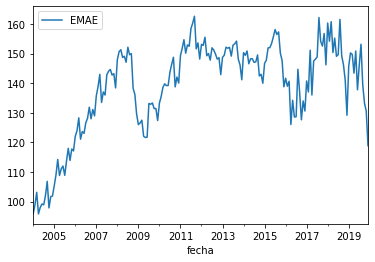

In [101]:
emae_construccion.plot()

In [102]:
emae_construccion = emae_construccion.loc[emae_construccion.index >= '2011-01-01']

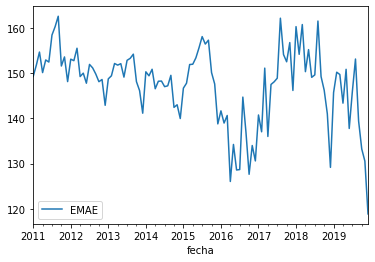

In [103]:
emae_construccion.plot()

### Estandarizo armado de analisis ARIMA

In [9]:
import itertools

In [12]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [20]:
import statsmodels.api as sm

In [52]:
data = {}

results_df = pd.DataFrame()

y = emae_construccion
i = 0
for param in pdq:
    for param_seasonal in seasonal_pdq:
        mod = sm.tsa.statespace.SARIMAX(y,
                                        order=param,
                                        freq='MS',
                                        seasonal_order=param_seasonal,
                                        enforce_stationarity=False,
                                        enforce_invertibility=False)

        results = mod.fit()
        print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        data['iter'] = i
        data['p'] = param[0]
        data['d'] = param[1]
        data['q'] = param[2]

        data['s_p'] = param_seasonal[0]
        data['s_d'] = param_seasonal[1]
        data['s_q'] = param_seasonal[2]
        
        data['AIC'] = results.aic
        
        aux_df = pd.DataFrame(data=data, index=[0])
        
        results_df = pd.concat([results_df, aux_df], axis=0, ignore_index=True)
        
        i += 1



C:\Users\jhevia\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\jhevia\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\jhevia\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\jhevia\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1374.5692269235708
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1126.975599812121
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:725.0690354170864
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:603.143263094832
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:730.82997162639
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:674.0507839392133


C:\Users\jhevia\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\jhevia\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\jhevia\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:622.1405179256205
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:601.5733280603841

C:\Users\jhevia\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\jhevia\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)



ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1232.8754227929337


C:\Users\jhevia\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1001.1527153820049
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:639.9456673022075


C:\Users\jhevia\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\jhevia\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:544.532279588192


C:\Users\jhevia\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:651.8715158615979


C:\Users\jhevia\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\jhevia\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\jhevia\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\jhevia\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:644.5752998795036
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:564.1695721345808
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:547.3536966996497
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:704.9245028110151
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:596.8262355058158
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:567.9505500541487
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:495.7150538417085

C:\Users\jhevia\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\jhevia\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\jhevia\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\jhevia\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)



ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:568.7436602797625
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:563.0914070270788
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:503.23908445698135


C:\Users\jhevia\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\jhevia\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\jhevia\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\jhevia\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:499.7074649927151
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:682.114665577242
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:587.041362896273
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:562.8903735575617


C:\Users\jhevia\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\jhevia\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\jhevia\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\jhevia\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:485.935017496592
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:567.7050801961711
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:553.5180411406931

C:\Users\jhevia\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\jhevia\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\jhevia\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)



ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:499.1180905204739


C:\Users\jhevia\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:490.18360892254873
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:712.2891708704148
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:603.9302313505266


C:\Users\jhevia\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\jhevia\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\jhevia\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\jhevia\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\jhevia\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarni

ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:570.7265322344533
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:498.37569861483075
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:569.4793356372612
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:564.9737316221538


C:\Users\jhevia\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\jhevia\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:501.17107381716505
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:502.4604396258791


C:\Users\jhevia\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\jhevia\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:689.2188716994283
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:594.2584162765214


C:\Users\jhevia\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\jhevia\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:566.5469158430952
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:490.9782988036319

C:\Users\jhevia\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)



ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:568.762679833674


C:\Users\jhevia\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\jhevia\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:557.7268622408164
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:499.33159561858514


C:\Users\jhevia\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\jhevia\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:495.31464800181345
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:686.2537535546787
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:591.0632860597482
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:567.7024593853265


C:\Users\jhevia\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\jhevia\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\jhevia\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\jhevia\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:489.919124705218
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:562.2739849240158
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:557.54752622745

C:\Users\jhevia\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\jhevia\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\jhevia\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)



ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:493.3207291296617


C:\Users\jhevia\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:494.2832734725681
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:682.3578794568454
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:587.6829897570932
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:564.6835126318703

C:\Users\jhevia\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\jhevia\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\jhevia\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)



ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:486.74550470127605


C:\Users\jhevia\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\jhevia\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:564.2532490982292
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:554.1490916884115


C:\Users\jhevia\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\jhevia\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:495.1074730450312


C:\Users\jhevia\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:491.0466852505155


In [107]:
def ARIMA_summary(y,results_df):
    
    best_pdq = tuple(results_df.loc[results_df.AIC == results_df.AIC.min(), ['p', 'd', 'q']].values[0])    
    best_s_pdq = tuple(results_df.loc[results_df.AIC == results_df.AIC.min(), ['s_p', 's_d', 's_q', 's_M']].values[0])
    
    print(f'BEST ARIMA : {best_pdq} x {best_s_pdq}')
    
    mod = sm.tsa.statespace.SARIMAX(y,
                                    order=best_pdq,
                                    seasonal_order=best_s_pdq,
                                    enforce_stationarity=False,
                                    enforce_invertibility=False)
    results = mod.fit()
    print(results.summary().tables[1])

    results.plot_diagnostics(figsize=(16, 8))
    plt.show()
    
    return results
    
# plot_ARIMA_summary(emae_construccion, results_df)

In [142]:
def plot_proyecciones(time_series, results_ARIMA, init_year='2014', starting_year='2018'):
    plt.clf()
    
    pred = results_ARIMA.get_prediction(start=pd.to_datetime(f'{starting_year}-01-01'), end=pd.to_datetime('2026-01-01'),
                                  dynamic=False)
    pred_ci = pred.conf_int()
    ax = time_series[init_year:].plot(label='observed')
    pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
    ax.fill_between(pred_ci.index,
                    pred_ci.iloc[:, 0],
                    pred_ci.iloc[:, 1], color='k', alpha=.2)
    ax.set_xlabel('Date')
    ax.set_ylabel('Furniture Sales')
    plt.legend()

    plt.tight_layout()
    
    return pred.predicted_mean
    
# plot_proyecciones(results)

In [106]:
import warnings
warnings.filterwarnings('ignore')

In [146]:
def get_proyeccion_SARIMA(ts_a_proyectar, plot_init_year='2014', pred_starting_year='2018'):
    
    p = d = q = range(0, 2)
    pdq = list(itertools.product(p, d, q))
    seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
    
    i=0
    results_df = pd.DataFrame()
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            
            mod = sm.tsa.statespace.SARIMAX(ts_a_proyectar,
                                            order=param,
                                            freq='MS',
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit(freq='MS')
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            data['iter'] = i
            data['p'] = param[0]
            data['d'] = param[1]
            data['q'] = param[2]

            data['s_p'] = param_seasonal[0]
            data['s_d'] = param_seasonal[1]
            data['s_q'] = param_seasonal[2]
            data['s_M'] = 12

            data['AIC'] = results.aic

            aux_df = pd.DataFrame(data=data, index=[0])

            results_df = pd.concat([results_df, aux_df], axis=0, ignore_index=True)

            i += 1
    
    results = ARIMA_summary(ts_a_proyectar, results_df)
    
    prediccion = plot_proyecciones(ts_a_proyectar, results, init_year=plot_init_year, starting_year=pred_starting_year)
    
    return prediccion


# prediccion_EMAE_CONSTRUCCION = get_proyeccion_SARIMA(emae_construccion)    

## Produccion Oil m3 Argentina

In [125]:
idx = pd.date_range(start='2015-01-01', end='2019-12-01', freq='MS')
idx

DatetimeIndex(['2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
               '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
               '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01',
               '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01',
               '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
      

In [129]:
produccion_oil_argentina = pd.read_excel('./Data para Proyecciones/TD_S_SescoWebUP_02_2020.xlsx', sheet_name='Oil Production Argentina').astype(int)
produccion_oil_argentina.set_index(idx, inplace=True)

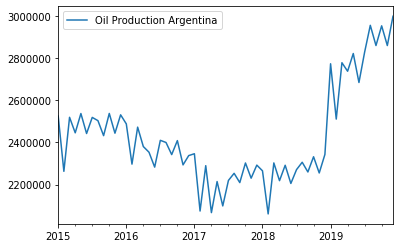

In [131]:
produccion_oil_argentina.plot()

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1689.580054394801
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:66870450.46469085
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:98883475.44344053
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:667.4085744430533
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1016.0203168605624
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:61348406.987823136
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:690.3943026474813
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:665.3956906668938
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1454.5813635105599
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:61596157.87877097
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:949.3260168307179
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:618.171971905622
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1131.2590622872995
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:56092292.12466239
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:673.7926005315094
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:620.1525215238902
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1233.9305580560297
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:86981.41703224415
ARIMA(

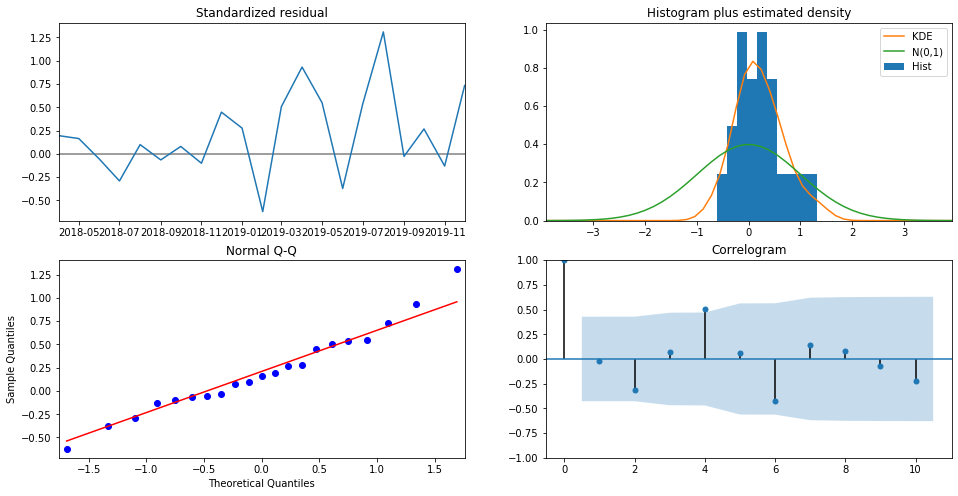

<Figure size 432x288 with 0 Axes>

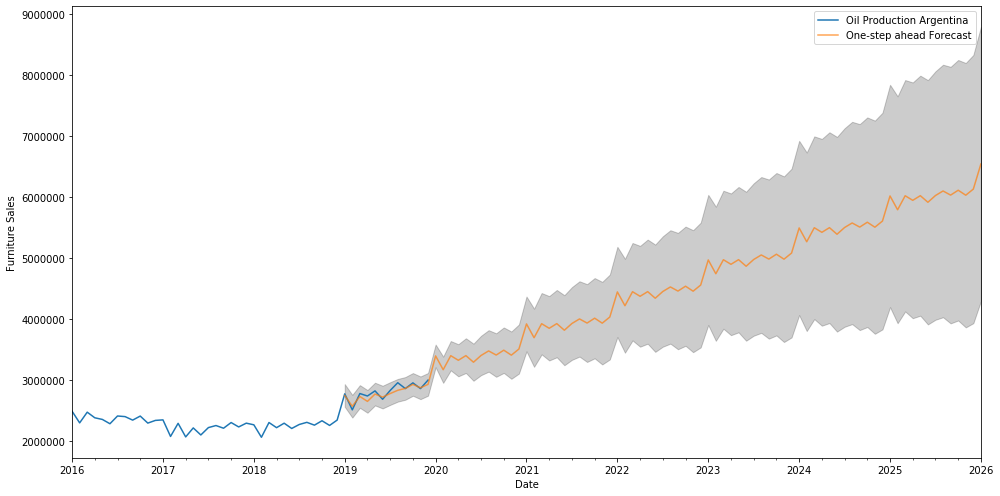

In [148]:
prediccion_OIL_ARGENTINA = get_proyeccion_SARIMA(produccion_oil_argentina.loc[produccion_oil_argentina.index >= '2016-01-01'],
                                                pred_starting_year='2019')

## Produccion Oil Patagonia

In [138]:
idx = pd.date_range(start='2015-01-01', end='2019-12-01', freq='MS')
idx

DatetimeIndex(['2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
               '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
               '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01',
               '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01',
               '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
      

In [139]:
produccion_oil_patagonia = pd.read_excel('./Data para Proyecciones/TD_S_SescoWebUP_02_2020.xlsx', sheet_name='Oil Production Patagonia').astype(int)
produccion_oil_patagonia.set_index(idx, inplace=True)

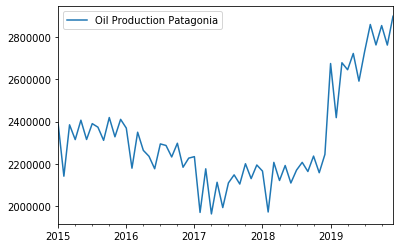

In [140]:
produccion_oil_patagonia.plot()

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1670.127261143568
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:60634893.15687496
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:98163590.40614438
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:667.8670427629963
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1014.9836741484734
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:55628320.4855224
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:690.081462969837
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:665.8974657753831
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1450.703589049467
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:55885433.778262176
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:949.112605855139
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:618.1422689830115
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1128.2496052355648
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:50891983.44307412
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:673.7460593596978
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:620.1279354450942
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:20723870.87816753
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:79224.95205762393
ARIMA(0, 1

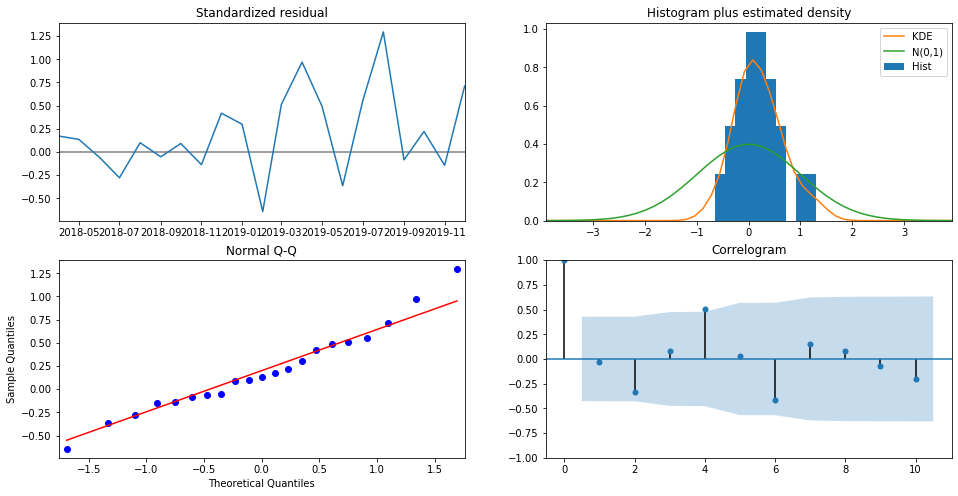

<Figure size 432x288 with 0 Axes>

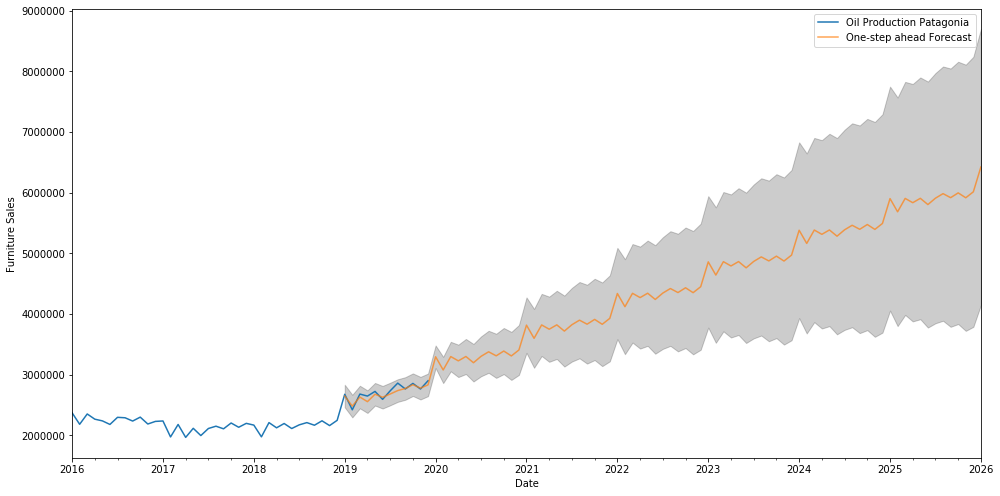

In [147]:
prediccion_OIL_PATAGONIA = get_proyeccion_SARIMA(produccion_oil_patagonia.loc[produccion_oil_patagonia.index >= '2016-01-01'],
                                                pred_starting_year='2019')

## PBI Valor Agregado

In [156]:
serie_PBI_VA = pd.read_excel('./Data para Proyecciones/Dataset_Proyecciones.xlsx')
serie_PBI_VA = serie_PBI_VA[['Año mes', 'PBI Valor Agregado']]
serie_PBI_VA['Año mes'] = pd.to_datetime(serie_PBI_VA['Año mes'], format='%Y-%m-%d')
serie_PBI_VA.set_index('Año mes', inplace=True)
serie_PBI_VA = serie_PBI_VA.astype(int)
serie_PBI_VA

,PBI Valor Agregado
Año mes,
2015-01-01,4274443
2015-02-01,4274443
2015-03-01,4274443
2015-04-01,5016966
2015-05-01,5016966
2015-06-01,5016966
2015-07-01,5226640
2015-08-01,5226640
2015-09-01,5226640


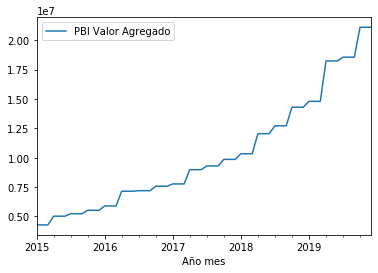

In [157]:
serie_PBI_VA.plot()

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:3041.6273298419287
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:336255789.85675335
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1879.6499160490357
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:3316.903414502136
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1426.4503451538753
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1400.9906797810238
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1085.2697307235187
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:3217.0207624539603
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:2014.6851465275242
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:241520855.89905643
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1497.2958144776724
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:3329.2441198633455
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1656.414128691662
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1589.61881620878
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1163.9827041000615
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:3267.381109009446
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1804.3020746320744
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1374.98160400002

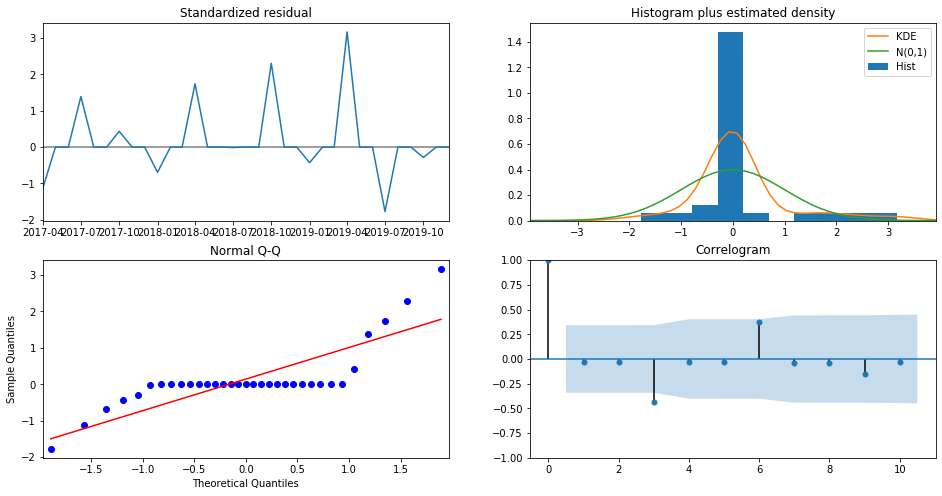

<Figure size 432x288 with 0 Axes>

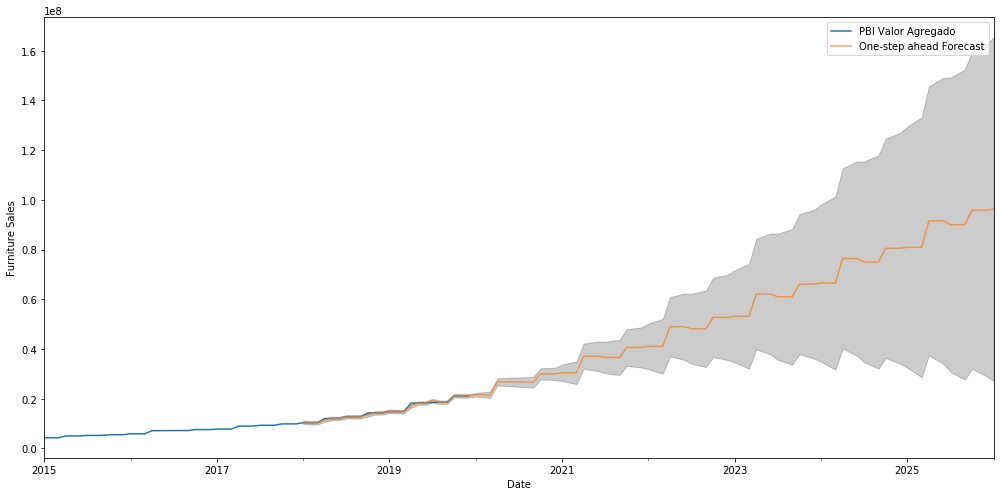

In [162]:
prediccion_PBI_VA = get_proyeccion_SARIMA(serie_PBI_VA)

## Precio Brent

In [169]:
time_series_brent = pd.read_csv('./Data para Proyecciones/BrentOilPrices.csv')
time_series_brent = time_series_brent[['Date', 'Price']]

time_series_brent.Date = pd.to_datetime(time_series_brent.Date, format='%d-%b-%y')
time_series_brent.set_index('Date', inplace=True)


In [174]:
time_series_brent = time_series_brent.loc[time_series_brent.index >= '2015-01-01']
time_series_brent = time_series_brent.resample('MS').mean()

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:671.4362009888531
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:504.60357317291124
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:402.8640577993299
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:303.219001535474
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:413.22192530029315
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:388.4908332034367
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:313.7964614909251
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:306.49252210941165
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:585.257151544956
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:437.7291630140851
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:354.029183078748
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:264.0741002877311
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:374.2983305377301
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:361.0111821890291
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:281.92466663478154
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:267.8548094197389
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:356.93519793883956
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:285.6103986576172
ARIMA(0,

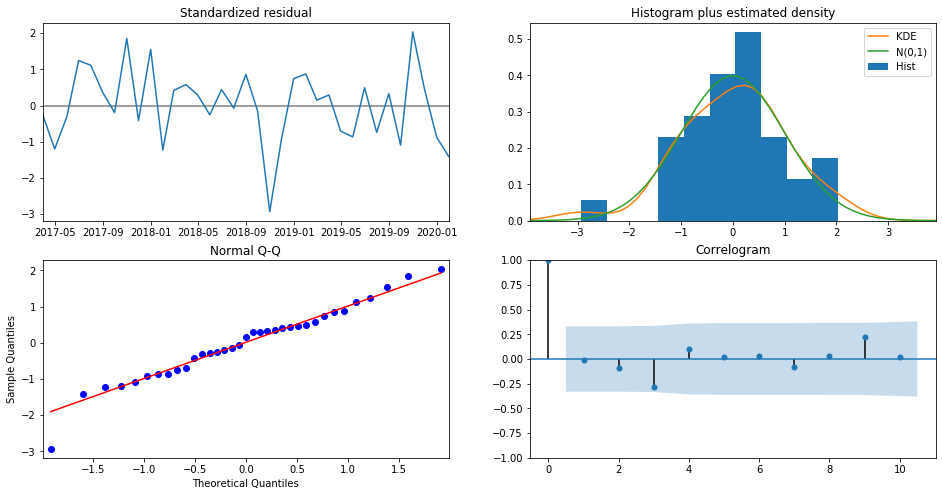

<Figure size 432x288 with 0 Axes>

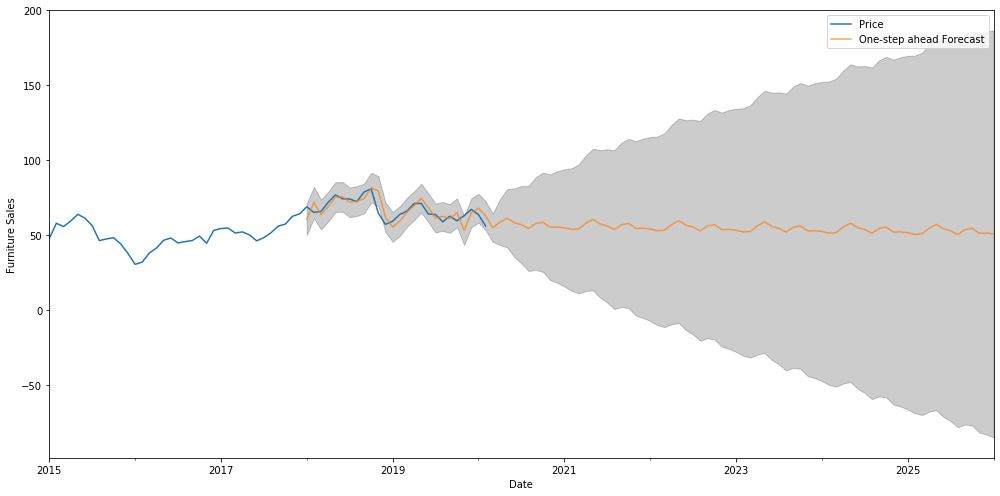

In [176]:
prediccon_BRENT = get_proyeccion_SARIMA(time_series_brent)

# Predigo demanda de antishock

In [185]:
prediccon_BRENT.head()

2018-01-01    60.747853
2018-02-01    71.897620
2018-03-01    63.884743
2018-04-01    69.171778
2018-05-01    75.483751
Freq: MS, dtype: float64

In [199]:
X_predicciones = pd.concat([
    prediccion_EMAE_CONSTRUCCION,
    prediccion_OIL_PATAGONIA,
    prediccion_OIL_ARGENTINA,
    prediccion_PBI_VA,
    prediccon_BRENT,
          ], axis=1)

X_predicciones = X_predicciones.loc[X_predicciones.index >= '2020-01-01']
X_predicciones.head()

,0,1,2,3,4
2020-01-01,133.080417,3.293488e+06,3.394012e+06,2.159155e+07,68.096629
2020-02-01,133.074710,3.075666e+06,3.167542e+06,2.159155e+07,63.112743
2020-03-01,136.642103,3.296680e+06,3.397515e+06,2.159155e+07,55.077016
2020-04-01,127.909303,3.225925e+06,3.322375e+06,2.677435e+07,58.859921
2020-05-01,134.871130,3.297982e+06,3.398712e+06,2.677435e+07,61.396319


In [194]:
mvp.params

const                         -665430.326809
EMAE Construccion                4068.769186
Produccion Oil m3 Patagonia        -8.121423
Produccion Oil m3 Argentina         7.884698
PBI Valor Agregado                  0.026893
Precio Brent                    -4689.929959
dtype: float64

In [214]:
X_predicciones.values

array([[1.33080417e+02, 3.29348752e+06, 3.39401227e+06, 2.15915537e+07,
        6.80966288e+01],
       [1.33074710e+02, 3.07566551e+06, 3.16754238e+06, 2.15915537e+07,
        6.31127432e+01],
       [1.36642103e+02, 3.29668040e+06, 3.39751492e+06, 2.15915537e+07,
        5.50770162e+01],
       [1.27909303e+02, 3.22592494e+06, 3.32237484e+06, 2.67743480e+07,
        5.88599207e+01],
       [1.34871130e+02, 3.29798198e+06, 3.39871190e+06, 2.67743480e+07,
        6.13963192e+01],
       [1.26778852e+02, 3.19519178e+06, 3.29063768e+06, 2.67743480e+07,
        5.84526398e+01],
       [1.31100941e+02, 3.30049562e+06, 3.40112991e+06, 2.66428334e+07,
        5.71419570e+01],
       [1.40291498e+02, 3.37526567e+06, 3.47561907e+06, 2.66428334e+07,
        5.46354548e+01],
       [1.29138580e+02, 3.30892761e+06, 3.40792575e+06, 2.66428334e+07,
        5.79212414e+01],
       [1.24090109e+02, 3.38777184e+06, 3.48782213e+06, 2.99883477e+07,
        5.87500183e+01],
       [1.22391531e+02, 3.3071

In [219]:
x = sm.add_constant(X_predicciones)

prediccion_DEMANDA_GUANTES = mvp.predict(x)

In [237]:

pred_results = mvp.get_prediction(x)

In [233]:
mvp.params

const                         -665430.326809
EMAE Construccion                4068.769186
Produccion Oil m3 Patagonia        -8.121423
Produccion Oil m3 Argentina         7.884698
PBI Valor Agregado                  0.026893
Precio Brent                    -4689.929959
dtype: float64

In [234]:
def get_regression(x):
    return -665430.326809 + 4068.769186 * x[0] - 8.121423 * x[1] + 7.884698 * x[2] + 0.026893 * x[3] - 4689.929959 * x[4]

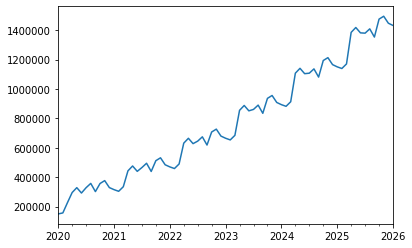

In [236]:
X_predicciones.apply(get_regression, axis=1).plot()

# Ploteo ambas series

In [222]:
historico_DEMANDA_GUANTES = pd.read_excel('./Data para Proyecciones/Dataset_Proyecciones.xlsx')[['Año mes', 'Demanda de guantes']]
historico_DEMANDA_GUANTES.head()

,Año mes,Demanda de guantes
0,2015-01-01,275118.860759
1,2015-02-01,257997.421384
2,2015-03-01,255388.500000
3,2015-04-01,204928.248447
4,2015-05-01,236073.407407


In [319]:
X_predicciones.columns = ['EMAE Construccion', 'Produccion Oil m3 Patagonia',
                          'Produccion Oil m3 Argentina', 'PBI Valor Agregado', 'Precio Brent']

In [324]:
X_predicciones.merge(prediccion_df, left_index=True, right_index=True).to_excel('./MATRIZ_PROYECCION_DEMANDA_GUANTES_v1.xlsx')

In [228]:
prediccion_DEMANDA_GUANTES_df = prediccion_DEMANDA_GUANTES.to_frame().reset_index()
prediccion_DEMANDA_GUANTES_df.columns = ['Año mes', 'Demanda de guantes']

test = pd.concat([historico_DEMANDA_GUANTES, prediccion_DEMANDA_GUANTES_df], axis=0, ignore_index=False)
test.head()

,Año mes,Demanda de guantes
0,2015-01-01,275118.860759
1,2015-02-01,257997.421384
2,2015-03-01,255388.500000
3,2015-04-01,204928.248447
4,2015-05-01,236073.407407


In [ ]:
test.to_excel('./PREDICCION_DEMANDA_GUANTES_V1.xlsx')

In [229]:
test.shape

(133, 2)

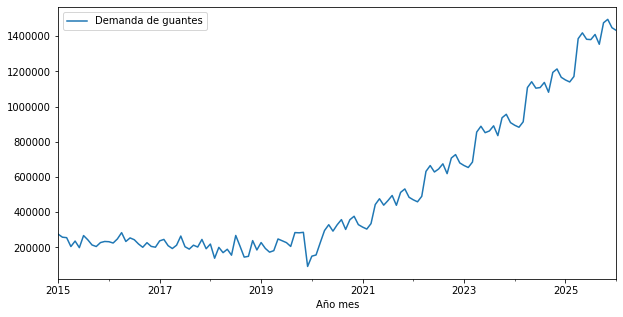

In [232]:
test.set_index('Año mes').plot(figsize=(10, 5))

# con objeto Prediction Results

In [245]:
pred_results.predicted_mean

array([ 150288.27114157,  157017.01321353,  227527.53743928,
        295811.93507648,  328931.44001824,  292481.54795486,
        328658.24655371,  357893.18448825,  302122.48741658,
        357295.91638808,  376883.75635649,  329493.2213209 ,
        315499.98835267,  304209.22943967,  335248.89274759,
        443257.8228224 ,  476377.32776415,  439927.43570077,
        465764.09552396,  494999.03345849,  439228.33638682,
        512524.4577635 ,  532112.29773191,  484721.76269634,
        470354.37565789,  459063.61674487,  490103.28005278,
        631764.82953651,  664884.33447826,  628434.44241487,
        645511.54313847,  674746.48107301,  618975.78400133,
        707624.53592525,  727212.37589365,  679821.84085812,
        665137.48937093,  653846.73045788,  684886.39376579,
        855056.74432503,  888176.24926678,  851726.35720338,
        861382.80145907,  890617.7393936 ,  834847.04232192,
        936501.76816241,  956089.60813082,  908699.07309531,
        893746.20532096,

In [270]:
pred_results.conf_int()

array([[  68968.43037928,  231608.11190386],
       [  91507.42406612,  222526.60236095],
       [ 161915.09621236,  293139.9786662 ],
       [ 229373.94689749,  362249.92325548],
       [ 256003.23405332,  401859.64598316],
       [ 224203.00194292,  360760.09396679],
       [ 259509.67453515,  397806.81857227],
       [ 279133.15083528,  436653.21814123],
       [ 239164.46315526,  365080.5116779 ],
       [ 264676.73802709,  449915.09474907],
       [ 276094.25201364,  477673.26069933],
       [ 243085.04148125,  415901.40116055],
       [ 230466.81788485,  400533.15882049],
       [ 218033.5273031 ,  390384.93157624],
       [ 247328.13910538,  423169.64638979],
       [ 293130.14845759,  593385.49718722],
       [ 317638.56335594,  635116.09217236],
       [ 288710.93368895,  591143.93771259],
       [ 318641.29781835,  612886.89322957],
       [ 339665.31477316,  650332.75214383],
       [ 299790.32486517,  578666.34790847],
       [ 327894.09008204,  697154.82544496],
       [ 3

In [251]:
test.set_index('Año mes', inplace=True)

In [273]:
prediccion = {
    'prediccion': pred_results.predicted_mean,
    'lower CI': [i[0] for i in pred_results.conf_int()],
    'upper CI': [i[1] for i in pred_results.conf_int()],
}

prediccion_df = pd.DataFrame(data=prediccion)

In [283]:
dr

DatetimeIndex(['2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31',
               '2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30',
               '2021-05-31', '2021-06-30', '2021-07-31', '2021-08-31',
               '2021-09-30', '2021-10-31', '2021-11-30', '2021-12-31',
               '2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30',
               '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31',
               '2022-09-30', '2022-10-31', '2022-11-30', '2022-12-31',
               '2023-01-31', '2023-02-28', '2023-03-31', '2023-04-30',
               '2023-05-31', '2023-06-30', '2023-07-31', '2023-08-31',
               '2023-09-30', '2023-10-31', '2023-11-30', '2023-12-31',
               '2024-01-31', '2024-02-29', '2024-03-31', '2024-04-30',
               '2024-05-31', '2024-06-30', '2024-07-31', '2024-08-31',
      

In [285]:
dr = pd.date_range(start='2020-01-01', end='2026-01-01', freq='MS')
prediccion_df['fecha'] = dr
prediccion_df.head()

,prediccion,lower CI,upper CI,fecha
0,150288.271142,68968.430379,231608.111904,2020-01-01
1,157017.013214,91507.424066,222526.602361,2020-02-01
2,227527.537439,161915.096212,293139.978666,2020-03-01
3,295811.935076,229373.946897,362249.923255,2020-04-01
4,328931.440018,256003.234053,401859.645983,2020-05-01


In [288]:
prediccion_df.to_excel('./PREDICCION_DEMANDA_GUANTES-CI.xlsx')

In [313]:
prediccion_df.set_index('fecha', inplace=True)

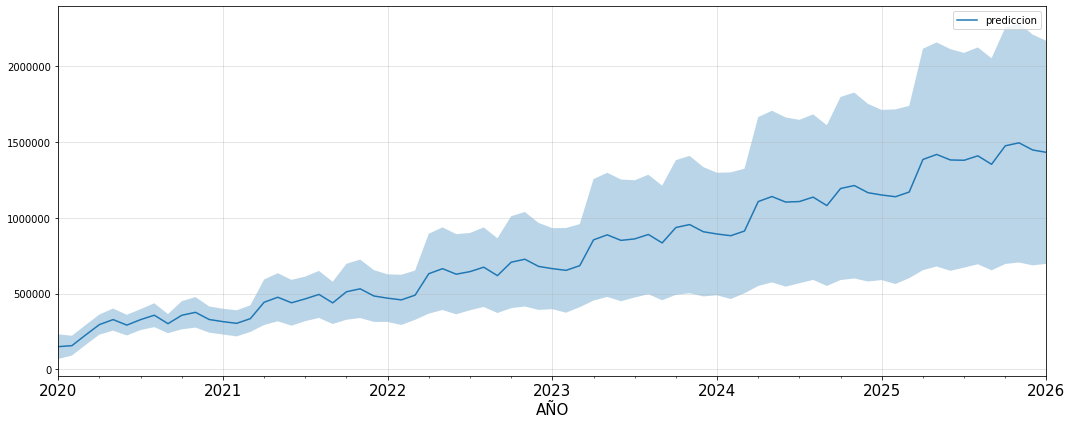

In [317]:
fig, ax = plt.subplots(1,1, figsize=(15, 6))
prediccion_df.plot( y='prediccion', ax=ax)
ax.fill_between(prediccion_df.index,
                y1=prediccion_df['lower CI'],
                y2=prediccion_df['upper CI'], alpha=0.3)

plt.grid(True, alpha=0.4)

# plt.xticks(prediccion_df.index, zip(prediccion_df.fecha.dt.year, prediccion_df.fecha.dt.month), rotation=90)
plt.xlabel('AÑO', fontsize=15)
plt.xticks(fontsize=15)
plt.tight_layout()
plt.savefig('./visuals/proyeccion_demanda_guantes.jpg')